<a href="https://colab.research.google.com/github/MendesEric/TransferLearningKeras/blob/main/CIFAR10MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras as k
from keras import datasets
from keras.datasets import cifar10
from keras import applications
from tensorflow.keras.applications.mobilenet import MobileNet
from keras.layers import Dense, LSTM, \
    Flatten, TimeDistributed, Conv2D, Dropout, BatchNormalization
from keras import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.mobilenet import preprocess_input

In [ ]:
#importando o dataset direto do keras
(x_train, y_train), (x_test, y_test) = k.datasets.cifar10.load_data()
#one hot encoding para as 10 classes do cifar10 e pré processamento necessário para MobileNet
def processa(x1,x2,y1,y2):
  x1 = tf.keras.applications.mobilenet.preprocess_input(x1)
  x2 = tf.keras.applications.mobilenet.preprocess_input(x2)
  y1 = to_categorical(y1,10)
  y2 = to_categorical(y2,10)
  return x1,x2,y1,y2

x_train, x_test, y_train, y_test = processa(x_train, x_test, y_train, y_test)

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
#Como a mobilenet foi treinada com tamanho diferente de imagens (224x224), é necessário realizar um "upscale".
inputs = k.Input(shape=(32, 32, 3))
upscale = k.layers.Lambda(lambda x: tf.image.resize_with_pad(x,
                                                    160,
                                                    160,
                                                    method=tf.image.ResizeMethod.BILINEAR))(inputs)

In [ ]:
mobilenet = MobileNet(
            input_shape=(160,160,3),
            input_tensor = upscale,
            alpha=1.0,
            depth_multiplier=1,
            dropout=0.001,
            include_top=False,
            weights="imagenet",
            pooling=max,
            classifier_activation="softmax",
    
)

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
out = mobilenet.output
out = Flatten()(out)
out = BatchNormalization()(out)
out = Dense(256, activation='relu')(out)
out = Dropout(0.3)(out)
out = BatchNormalization()(out)
out = Dense(128, activation='relu')(out)
out = Dropout(0.3)(out)
out = BatchNormalization()(out)
out = Dense(64, activation='relu')(out)
out = Dropout(0.3)(out)
out = Dense(10, activation='softmax')(out)

In [ ]:
model = k.models.Model(inputs = inputs, outputs = out)
model.compile(optimizer='Adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 307s 185ms/step - loss: 0.7582 - accuracy: 0.7655 - val_loss: 0.4982 - val_accuracy: 0.8347
Epoch 2/10
1563/1563 [==============================] - 286s 183ms/step - loss: 0.4932 - accuracy: 0.8506 - val_loss: 0.4521 - val_accuracy: 0.8511
Epoch 3/10
1563/1563 [==============================] - 286s 183ms/step - loss: 0.4059 - accuracy: 0.8753 - val_loss: 0.5015 - val_accuracy: 0.8473
Epoch 4/10
1563/1563 [==============================] - 293s 188ms/step - loss: 0.3495 - accuracy: 0.8933 - val_loss: 0.3216 - val_accuracy: 0.8938
Epoch 5/10
1563/1563 [==============================] - 294s 188ms/step - loss: 0.3050 - accuracy: 0.9056 - val_loss: 0.3513 - val_accuracy: 0.8883
Epoch 6/10
1563/1563 [==============================] - 286s 183ms/step - loss: 0.2634 - accuracy: 0.9190 - val_loss: 0.3082 - val_accuracy: 0.8988
Epoch 7/10
1563/1563 [==============================] - 293s 188ms/step - loss: 0.2253 - accuracy: 0.9320 - val_

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 15s 47ms/step - loss: 0.3016 - accuracy: 0.9117


[0.30163252353668213, 0.9117000102996826]

In [ ]:
import matplotlib.pyplot as plt

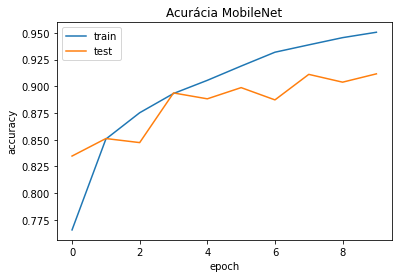

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia MobileNet')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

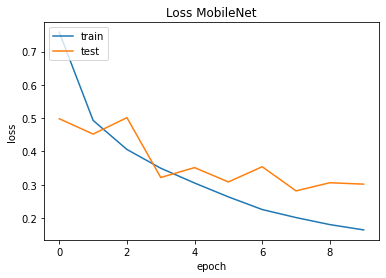

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss MobileNet')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()